**1 CNN for image classification**

In this assignment, you will create a simple image classifier using convolutional neural network (CNN). You have the freedom to use any programming language and toolkit of your choice, but it is recommended to use the Python programming language along with TensorFlow and Keras or PyTorch to construct the convolutional neural network (CNN).

1. Why CNNs preferable for image classification over multilayered perceptrons (MLPs)
or simple feedforward neural networks (NNs)?

2. Set up your environment: Ensure that you have installed all the required software
packages.

3. Prepare your dataset: Download the CIFAR-10 dataset. This dataset contains 60,000
color images in 10 different classes. Documentation of this data set can be found
in CIFAR-10 dataset. You may use listing 1 to load data. Further, apply suitable
feature scaling. Refer this for more information "pytorch normalization".

4. Split the dataset into training, validation, and testing subsets using a ratio of 60%
for training and 20% each for validation and testing sets1
.


In [1]:
# For PyTorch
import torchvision
import torchvision.transforms as transforms

# Define data transformations (optional, but recommended)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# Load the training dataset
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, transform=transform, download=True)

# Load the testing dataset
test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False, transform=transform, download=True)

# For Keras
from keras.datasets import cifar10

# Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


Files already downloaded and verified
Files already downloaded and verified


In [2]:
from sklearn.model_selection import train_test_split

# Split the dataset into training (60%), validation (20%), and testing (20%) sets
train_images, val_images, train_labels, val_labels = train_test_split(train_images, train_labels, test_size=0.2, random_state=42)



5. Build the CNN model: A common CNN design consists of interleaving convolutional
and max-pooling layers, ending with a linear classification layer [1]. This pattern is
illustrated in Figure 1
2
, and it was inspired by Fukushima’s neocognitron [2] and
Hubel and Wiesel’s work on human visual cortex [3]. Yann LeCun’s LeNet model
refined this approach in 1998, popularizing it through backpropagation and SGD [4].
In this example (Figure 1), we exclude normalization layers from the CNN design
because the model is relatively simple and not very deep. Here, the benefits of
normalization layers may not be visible. However, in deep neural networks, normalization layers, such as batch normalization or layer normalization, are often used to
improve training stability. They help mitigate issues like vanishing gradients and
can make it easier for deep networks to converge during training. Refer tensorflow
batch normalization and pytorch batch normalization for more information.


A basic CNN architecture is given below. Feel free to modify this network by adding
more layers.

• A Convolutional layer with x1 filters, a m1 × m1 kernel, and ’relu’ activation.

• A MaxPooling layer.

• Another Convolutional layer with x2 filters, a m2 × m2 kernel, and ’relu’ activation.

• Another MaxPooling layer.

• Flatten the output.

• A fully connected layer with x3 units and ’relu’ activation.

• Add dropout with a rate of d to reduce overfitting.

• An output layer with 10 units (for 10 classes) and ’softmax’ activation.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

class SimpleCNN(nn.Module):
    def __init__(self, x1, m1, x2, m2, x3, d):
        super(SimpleCNN, self).__init__()
        # Convolutional layer 1
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=x1, kernel_size=m1, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.maxpool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional layer 2
        self.conv2 = nn.Conv2d(in_channels=x1, out_channels=x2, kernel_size=m2, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        self.maxpool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully connected layer
        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(x2 * (32 // 4) * (32 // 4), x3)
        self.relu3 = nn.ReLU()
        self.dropout = nn.Dropout(p=d)

        # Output layer
        self.fc2 = nn.Linear(x3, 10)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.maxpool1(self.relu1(self.conv1(x)))
        x = self.maxpool2(self.relu2(self.conv2(x)))
        x = self.flatten(x)
        x = self.dropout(self.relu3(self.fc1(x)))
        x = self.softmax(self.fc2(x))
        return x

# Instantiate the model
x1, m1, x2, m2, x3, d = 16, 3, 32, 3, 128, 0.5  # You can adjust these hyperparameters
model = SimpleCNN(x1, m1, x2, m2, x3, d)

# Print the model architecture
print(model)


SimpleCNN(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu1): ReLU()
  (maxpool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (relu2): ReLU()
  (maxpool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (fc1): Linear(in_features=2048, out_features=128, bias=True)
  (relu3): ReLU()
  (dropout): Dropout(p=0.5, inplace=False)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (softmax): Softmax(dim=1)
)


6. Determine the parameters of the above network such as kernel sizes, filter sizes, size
of the fully connected layer and dropout rate.

In [7]:
x1, m1, x2, m2, x3, d = 16, 3, 32, 3, 128, 0.5  # Adjust these hyperparameters
model = SimpleCNN(x1, m1, x2, m2, x3, d)


7. Train the model: Train the model using the training data for 20 epochs and plot
training and validation loss for with respect to epoch. Here, for the optimizer
you may use adam and sparse categorical crossentropy as the loss function. Set
a suitable learning rate. Refer this page to see available optimizers keras optimizers and pytorch optimizers. More information about optimizer can be found in
https://cs231n.github.io/neural-networks



8. Why we have chosen adam optimizer over SGD?



9. Why we have chosen sparse categorical crossentropy as the loss function?



10. Evaluate the Model: After training, evaluate the model’s performance on the testing
dataset. Record the train/test accuracy, confusion matrix, precision and recall.


11. Plot training and validation loss for with respect to epoch for different learning rates
such as 0.0001, 0.001, 0.01, and 0.1.

Epoch 1/20, Train Loss: 2.112538265907551, Val Loss: 2.005226839120221
Epoch 2/20, Train Loss: 2.0120140079342193, Val Loss: 1.9464396990028916
Epoch 3/20, Train Loss: 1.965852468977194, Val Loss: 1.9221945689741973
Epoch 4/20, Train Loss: 1.9425954384267177, Val Loss: 1.9002725918581531
Epoch 5/20, Train Loss: 1.9159675911259468, Val Loss: 1.8807257588501949
Epoch 6/20, Train Loss: 1.9031825654037164, Val Loss: 1.8583040495587002
Epoch 7/20, Train Loss: 1.8880001454402113, Val Loss: 1.8466004558429596
Epoch 8/20, Train Loss: 1.8760118771087178, Val Loss: 1.850966782326911
Epoch 9/20, Train Loss: 1.8662531430763967, Val Loss: 1.8386363185894716
Epoch 10/20, Train Loss: 1.8567381252718094, Val Loss: 1.8263673433073007
Epoch 11/20, Train Loss: 1.8465411847509692, Val Loss: 1.8277531687621098
Epoch 12/20, Train Loss: 1.8377282017332208, Val Loss: 1.8128202098190405
Epoch 13/20, Train Loss: 1.8319914444633152, Val Loss: 1.8150731940178355
Epoch 14/20, Train Loss: 1.8258912304173345, Val Lo

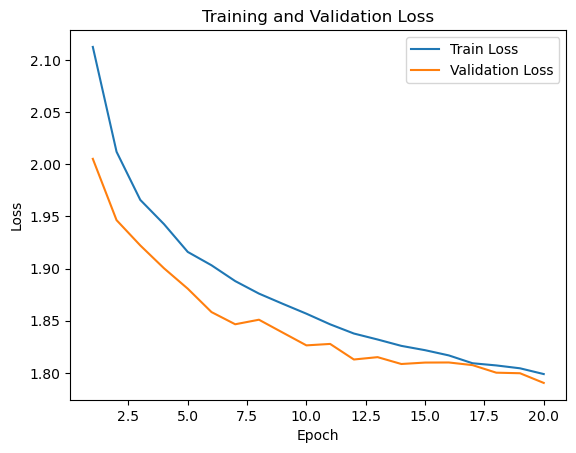

In [5]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Assuming you already have your training and validation datasets

# Define your data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Instantiate the model
model = SimpleCNN(x1, m1, x2, m2, x3, d)

# Define the loss function and the optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)  # You can adjust the learning rate

# Training loop
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    model.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    average_train_loss = running_train_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # Validation
    model.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    average_val_loss = running_val_loss / len(val_loader)
    val_losses.append(average_val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {average_train_loss}, Val Loss: {average_val_loss}')

# Plotting the training and validation loss
import matplotlib.pyplot as plt

plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()


**2 Compare your network with state-of-the-art networks***

"In practice, training an entire convolutional network from scratch (starting with
random initialization) is a rare occurrence. This is primarily due to the scarcity of
datasets of sufficient size. Instead, a common approach is to first pretrain a CNN
on an extensive dataset, such as ImageNet, which comprises 1.2 million images
across 1000 categories. Subsequently, this pretrained CNN can be utilized as either
an initialization point or a fixed feature extractor when tackling a specific task of
interest. This is known as transfer learning" 3
.

12. Choose two state-of-the-art pre-trained model or architecture like ImageNet, ResNet,
Googlenet, AlexNet, DenseNet and VGG.

13. Load the pre-trained model and fine-tune it for the CIFAR-10 dataset.

14. Train the fine-tuned model using the same training and testing data splits as your
custom CNN model.

15. Record training and validation loss values for each epoch.


c:\Users\MSI\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\MSI/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:04<00:00, 10.8MB/s]


Epoch 1/20, Train Loss: 0.9575070012789553, Val Loss: 0.7237245630306802
Epoch 2/20, Train Loss: 0.6490419842016971, Val Loss: 0.685377990364269
Epoch 3/20, Train Loss: 0.5174637781670484, Val Loss: 0.7416534693377792
Epoch 4/20, Train Loss: 0.42475844536672164, Val Loss: 0.5915965789062961
Epoch 5/20, Train Loss: 0.34454588947431813, Val Loss: 0.6382447030324085
Epoch 6/20, Train Loss: 0.27055500957476514, Val Loss: 0.7031436951676752
Epoch 7/20, Train Loss: 0.21772549507658348, Val Loss: 0.7747138180550496
Epoch 8/20, Train Loss: 0.17344701165676385, Val Loss: 0.6938500039896388
Epoch 9/20, Train Loss: 0.1527515132304119, Val Loss: 0.7515648219046319
Epoch 10/20, Train Loss: 0.12839907713715568, Val Loss: 0.7184100044760734
Epoch 11/20, Train Loss: 0.1078687837190183, Val Loss: 0.7679039877691086
Epoch 12/20, Train Loss: 0.09269474177023448, Val Loss: 0.8617060528059673
Epoch 13/20, Train Loss: 0.08559694795591204, Val Loss: 0.7954639227716787
Epoch 14/20, Train Loss: 0.0802073872551

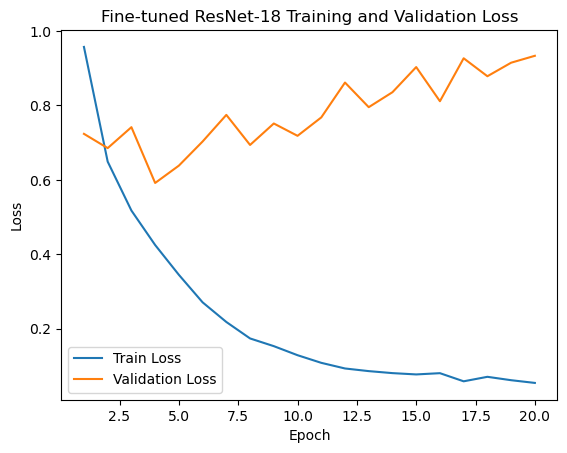

In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms, datasets, models
import matplotlib.pyplot as plt

# Assuming you have your training and validation datasets
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Load pre-trained ResNet-18 model
resnet18 = models.resnet18(pretrained=True)

# Modify the last layer for CIFAR-10 (10 classes instead of ImageNet's 1000 classes)
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 10)

# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet18.parameters(), lr=0.001)

# Fine-tuning loop
num_epochs = 20
train_losses = []
val_losses = []

for epoch in range(num_epochs):
    resnet18.train()
    running_train_loss = 0.0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_train_loss += loss.item()

    average_train_loss = running_train_loss / len(train_loader)
    train_losses.append(average_train_loss)

    # Validation
    resnet18.eval()
    running_val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            outputs = resnet18(inputs)
            loss = criterion(outputs, labels)
            running_val_loss += loss.item()

    average_val_loss = running_val_loss / len(val_loader)
    val_losses.append(average_val_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}, Train Loss: {average_train_loss}, Val Loss: {average_val_loss}')

# Plotting the training and validation loss
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Fine-tuned ResNet-18 Training and Validation Loss')
plt.legend()
plt.show()


16. Evaluate the fine-tuned model on the testing dataset and calculate the test accuracy

In [9]:
import torch
from sklearn.metrics import accuracy_score
import numpy as np

# Assuming you have your testing dataset loaded into a DataLoader
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Evaluate the fine-tuned model on the testing dataset
resnet18.eval()
all_predictions = []
all_labels = []

with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = resnet18(inputs)
        _, predictions = torch.max(outputs, 1)
        all_predictions.extend(predictions.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate accuracy
accuracy = accuracy_score(all_labels, all_predictions)

# Print the test accuracy
print(f'Test Accuracy: {accuracy}')


Test Accuracy: 0.8062


17. Compare the test accuracy of your custom CNN model with that of the fine-tuned
state-of-the-art model.



18. Discuss trade-offs, advantages, and limitations of using a custom model versus a
pre-trained model.

In [10]:
import torch
import torchvision
from torchvision import transforms, models
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from sklearn.metrics import accuracy_score

# Assuming you have the train_loader and test_loader already defined for CIFAR-10

# Function to load a pre-trained model and modify the classifier for CIFAR-10
def load_and_modify_model(model_name):
    if model_name == 'resnet':
        model = models.resnet18(pretrained=True)
        in_features = model.fc.in_features
        model.fc = nn.Linear(in_features, 10)  # Modify the classifier for CIFAR-10
    elif model_name == 'densenet':
        model = models.densenet121(pretrained=True)
        in_features = model.classifier.in_features
        model.classifier = nn.Linear(in_features, 10)  # Modify the classifier for CIFAR-10
    else:
        raise ValueError("Invalid model name")
    
    return model

# Function to fine-tune the model
def fine_tune_model(model, train_loader, test_loader, num_epochs=5, learning_rate=0.001):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Lists to store training and validation losses
    train_losses = []
    val_losses = []

    # Fine-tuning loop
    for epoch in range(num_epochs):
        model.train()
        running_train_loss = 0.0
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_train_loss += loss.item()

        # Average training loss for the epoch
        avg_train_loss = running_train_loss / len(train_loader)
        train_losses.append(avg_train_loss)

        # Validation
        model.eval()
        running_val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                running_val_loss += loss.item()

        # Average validation loss for the epoch
        avg_val_loss = running_val_loss / len(test_loader)
        val_losses.append(avg_val_loss)

        # Print progress
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {avg_train_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    return train_losses, val_losses

# Choose the models to fine-tune
model_names = ['resnet', 'densenet']

# Fine-tune each model
#resnet
print(f"\nFine-tuning {model_names[0]} for CIFAR-10:")
pre_trained_model = load_and_modify_model(model_names[0])
train_losses, val_losses = fine_tune_model(pre_trained_model, train_loader, test_loader)

# Print the final training and validation loss values
print(f"\nFinal Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")

#densenet
print(f"\nFine-tuning {model_names[1]} for CIFAR-10:")
pre_trained_model = load_and_modify_model(model_names[1])
train_losses, val_losses = fine_tune_model(pre_trained_model, train_loader, test_loader)

# Print the final training and validation loss values
print(f"\nFinal Training Loss: {train_losses[-1]:.4f}")
print(f"Final Validation Loss: {val_losses[-1]:.4f}")


Fine-tuning resnet for CIFAR-10:


c:\Users\MSI\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\MSI\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


KeyboardInterrupt: 

In [ ]:
import torch
from sklearn.metrics import accuracy_score

# Assuming you have the test_loader and the fine-tuned model already defined

def evaluate_model(model, test_loader):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    model.eval()
    all_predictions = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)
            all_predictions.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

    accuracy = accuracy_score(all_labels, all_predictions)
    print(f'Test Accuracy: {accuracy * 100:.2f}%')

# Assuming you have already fine-tuned the model and have it stored in the variable "pre_trained_model"
evaluate_model(pre_trained_model, test_loader)
